# TP3 SUR K-NN Page 70 a 89

#### Groupe 7 
    ####-NJONOU GABY 19M2347
    #### -MOUASSOM FERNAND 12W0902
    #### -FONE SIMO MERLIN 19M2382
    #### -EVINA KENNE RANDY  19M2456

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter


## Preparation des donnees

In [ ]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 60, 140, 95]:
    print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

index:   0, features: [5.1 3.5 1.4 0.2], label: 0
index:  60, features: [5.  2.  3.5 1. ], label: 1
index: 140, features: [6.7 3.1 5.6 2.4], label: 2
index:  95, features: [5.7 3.  4.2 1.2], label: 1


In [ ]:
### On divise le jet de donnees en 2 partie aue pour l'apprentissage et l aur=tre pour les tests

np.random.seed(42)
indices = np.random.permutation(len(data))

n_training_samples = 12

learn_data = data[indices[:-n_training_samples]]
learn_labels = labels[indices[:-n_training_samples]]

test_data = data[indices[-n_training_samples:]]
test_labels = labels[indices[-n_training_samples:]]

print("Premier echantillon de notre ensemble de donnees")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")
    
print("Echantillon de notre ensemble de test")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d} {learn_data[i]} {learn_labels[i]:3}")

Premier echantillon de notre ensemble de donnees
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1
Echantillon de notre ensemble de test
index  data                label
   0 [6.1 2.8 4.7 1.2]   1
   1 [5.7 3.8 1.7 0.3]   0
   2 [7.7 2.6 6.9 2.3]   2
   3 [6.  2.9 4.5 1.5]   1
   4 [6.8 2.8 4.8 1.4]   1


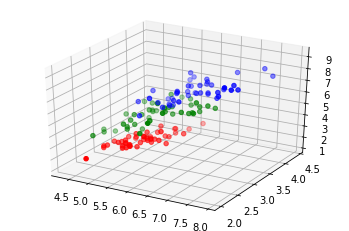

In [ ]:
### on visualise les donees en 3 d donc on ne va considerer que les 3 premiers attributs 

X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learn_data)):
        if learn_labels[i] == iclass:
            X[iclass][0].append(learn_data[i][0])
            X[iclass][1].append(learn_data[i][1])
            X[iclass][2].append(sum(learn_data[i][2:]))
colours = ("r", "g", "b")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

## Calcul des distances 

## il existe plusieurs type de distance notamment :
    - La distance euclidienne
    - La distance Manhattan 
    - La distance Minkowski

In [ ]:
## fonction pour calculer la distance euclidinne entre 2 points
def distanceEuclidienne(instance1, instance2):
    """ Distance euclidienne"""
    return np.linalg.norm(np.subtract(instance1, instance2))

print(distanceEuclidienne([3, 5], [1, 1]))
print(distanceEuclidienne(learn_data[3], learn_data[44]))

4.47213595499958
3.4190641994557516


In [ ]:
## fonction pour renvoyer les k pluss proche voisin d un element passer en paramettre **test instance
def get_neighbors(training_set,labels,test_instance,k,distance):
    """renvoyer les k plus proche voisin d un element passer en paramettre test instance"""
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [ ]:
## On teste si notre fonction fonctionne corectement
for i in range(5):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],5,distance=distanceEuclidienne)
    print("Index: ",i,'\n',
      "Testset Data: ",test_data[i],'\n',
      "Testset Label: ",test_labels[i],'\n',
      "Neighbors: ",neighbors,'\n')

Index:  0 
 Testset Data:  [5.7 2.8 4.1 1.3] 
 Testset Label:  1 
 Neighbors:  [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1), (array([5.7, 3. , 4.2, 1.2]), 0.24494897427831822, 1), (array([5.8, 2.7, 3.9, 1.2]), 0.26457513110645864, 1)] 

Index:  1 
 Testset Data:  [6.5 3.  5.5 1.8] 
 Testset Label:  2 
 Neighbors:  [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2), (array([6.4, 2.7, 5.3, 1.9]), 0.38729833462074154, 2), (array([6.4, 2.8, 5.6, 2.1]), 0.38729833462074165, 2)] 

Index:  2 
 Testset Data:  [6.3 2.3 4.4 1.3] 
 Testset Label:  1 
 Neighbors:  [(array([6.2, 2.2, 4.5, 1.5]), 0.26457513110645864, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1), (array([6.5, 2.8, 4.6, 1.5]), 0.60827625302982

In [ ]:
### pour compter la quantité de classes à l'intérieur d'une liste d'instances
## notement dans la liste des voisin pour savoir qui est le plus reccurent
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [ ]:
## on teste notre fonction vote

print("Avec 6 voisins")
print()

for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],10,distance=distanceEuclidienne)
    print("index: ", i,
    ", resultat du vote vote: ", vote(neighbors),
    ", label: ", test_labels[i],
    ", data: ", test_data[i])

print()
print("Avec 3 voisins")
print()

for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],6,distance=distanceEuclidienne)
    print("index: ", i,
    ", resultat du vote vote: ", vote(neighbors),
    ", label: ", test_labels[i],
    ", data: ", test_data[i])

Avec 6 voisins

index:  0 , resultat du vote vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , resultat du vote vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , resultat du vote vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , resultat du vote vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , resultat du vote vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , resultat du vote vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , resultat du vote vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , resultat du vote vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , resultat du vote vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , resultat du vote vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , resultat du vote vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , resultat du vote vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]

Avec 3 voisins

index:  0 , resultat du vote vote:  1 , l

In [ ]:
#Ici on veux savoir la classe predite avec la probabilite de prediction
def vote_prob(neighbors):
    """savoir la classe predite avec la probabilite de prediction"""
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
        labels, votes = zip(*class_counter.most_common())
        winner = class_counter.most_common(1)[0][0]
        votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [ ]:
## On teste notre fonctions

for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],10,distance=distanceEuclidienne)
    print("index: ", i,
            ", vote_prob: ", vote_prob(neighbors),
            ", label: ", test_labels[i],
            ", data: ", test_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 0.9) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 0.7) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 0.9) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


### Explication

Dans les cas precedent nous n'avons regardé que k objets à proximité d'un objet X , et avons eu un vote majoritaire.
le vote à la majorité s'est montré assez efficace dans notre exemple précédent, mais cela n'a pas pris en compte les éléments suivants
### Raisonnement 
 Plus un voisin est éloigné, plus il « s'écarte » du résultat « réel ». Ou en d'autres termes, nous pouvons
faites plus confiance aux voisins les plus proches qu'aux plus éloignés. Supposons que nous ayons 11 voisins d'un élément inconnu X. Les cinq voisins les plus proches appartiennent à une classe A et les six autres, plus éloignés, appartiennent à classe B. Quelle classe attribuer à X ? 
L'approche précédente dit B, parce que nous avons un vote de 6 contre 5
en faveur de B. D'autre part, les 5 les plus proches sont tous A et cela devrait compter davantage.
Pour poursuivre cette stratégie, nous pouvons attribuer des poids aux voisins de la manière suivante : Le voisin le plus proche deune instance reçoit un poids de 1/1, la seconde la plus proche reçoit un poids de 1/2 puis continue jusqu'à 1/ k pour le voisin le plus éloigné.
on va donc obtenir une suite harmonique somme(1/k)


In [ ]:
def vote_harmonic_weights(neighbors, all_results=True):
    """On prend en consideration des poids"""
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
        labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
            class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [ ]:

#On teste notre fonction
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],6,distance=distanceEuclidienne)
    print("index: ", i,
    ", result of vote: ",vote_harmonic_weights(neighbors,all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.9319727891156463), (1, 0.06802721088435375)])
index:  5 , result of vote:  (2, [(2, 0.8503401360544217), (1, 0.14965986394557826)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


L'approche précédente ne tenait compte que du classement des voisins selon leur distance. 
Nous pouvons améliorer le vote en utilisant la distance réelle. 
Pour cela, nous allons écrire une nouvelle fonction de vote

In [ ]:
def vote_distance_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        dist = neighbors[index][1]
        label = neighbors[index][2]
        class_counter[label] += 1 / (dist**2 + 1)
        labels, votes = zip(*class_counter.most_common())

        winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
            class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)

In [ ]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],6,distance=distanceEuclidienne)
    print("index: ", i,
          ", result of vote: ",vote_distance_weights(neighbors,all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.8490154592118361), (1, 0.15098454078816387)])
index:  5 , result of vote:  (2, [(2, 0.6736137462184478), (1, 0.3263862537815521)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


# KNN sur le traitement de la langue

La distance de Levenshtein est une distance, au sens mathématique du terme, 
donnant une mesure de la différence entre deux chaînes de caractères.
Elle est égale au nombre minimal de caractères qu'il faut supprimer, 
insérer ou remplacer pour passer d’une chaîne à l’autre.

In [ ]:
!pip install levenshtein

In [ ]:
from levenshtein import levenshtein

ModuleNotFoundError: ignored

In [ ]:
cities = open("city_names.txt").readlines()
cities = [city.strip() for city in cities]
for city in ["Freiburg", "Frieburg", "Freiborg","Hamborg", "Sahrluis"]:
    neighbors = get_neighbors(cities,cities,city,2,distance=levenshtein)
    print("vote_distance_weights: ", vote_distance_weights(neighbors))